In [36]:
import sys
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [37]:
df = pd.read_csv("./Desktop/haberman.csv")
X = df.iloc[:,:3]
Y2 = df[["Survival"]].values
Y = []
for i in Y2:
    if i== 1:
        Y.append(1)
    else:
        Y.append(0)
X = X.values

In [38]:
x_train, x_tmp, y_train, y_tmp = train_test_split(X,Y, test_size= 0.2)
x_test, x_val, y_test, y_val = train_test_split(x_tmp, y_tmp, test_size=0.5)

In [39]:
def logistic(x_train, y_train, sgd_step, lambd):    
    w = np.random.normal(0, 1, len(x_train[0]))
    h = lambda w,x: 1/(1+ np.exp(-(np.transpose(w) @ x)))

    for x,y in zip(x_train, y_train):
        w = w + sgd_step * np.subtract(y, h(w,x)) * x - lambd*w

    return w

def logistic_unreg(x_train, y_train, sgd_step):
    likelihoods = []
    
    w = np.random.normal(0, 1, len(x_train[0]))
    h = lambda w,x: 1/(1+ np.exp(-(np.transpose(w) @ x)))

    for x,y in zip(x_train, y_train):
        w = w + sgd_step * np.subtract(y, h(w,x)) * x

        l = 0
        for i, j in zip(x_train, y_train):
            l += j*np.log(h(w, i)) + (1-j)*np.log(1-h(w,i))
        likelihoods.append(l)

    return w, likelihoods
    
def logistic_l2(x_train, y_train, sgd_step, lambd):
    likelihoods = []
    
    w = np.random.normal(0, 1, len(x_train[0])) 
    h = lambda w,x: 1/(1+ np.exp(-(np.transpose(w) @ x))) 
    
    for x,y in zip(x_train, y_train):
        w = w + sgd_step * np.subtract(y, h(w,x)) * x - lambd*w

        l = 0
        for i, j in zip(x_train, y_train):
            l += j*np.log(h(w, i)) + (1-j)*np.log(1-h(w,i))
        likelihoods.append(l)

    return w, likelihoods
    
    
def accuracy(x_test, y_test, weights):
    tmp_pred = x_test @ weights
    h = lambda x: 1/( 1+np.exp(-x) )

    pred = [int(round(h(i))) for i in tmp_pred]

    count = 0
    for y, y_hat in zip(y_test, pred):
        if y==y_hat:
            count += 1
    return count/len(y_test)

def cross_val(x_train, y_train, x_val, y_val, step):
    max_acc = -sys.maxsize
    lambd = 0
    for i in np.linspace(0.005, 5, 500):
        
        cur_weights = logistic(x_train, y_train, step, i)
        try:
            cur_acc = accuracy(x_val, y_val, cur_weights)
        except:
            continue
            
        if (max_acc < cur_acc):
            max_acc = cur_acc
            lambd = i
            
    return lambd

In [40]:
step = 0.01

unreg_w, unreg_l = logistic_unreg(x_train, y_train, step)
unreg_acc = accuracy(x_test, y_test, unreg_w)

lambd = cross_val(x_train, y_train, x_val, y_val, step)

reg_w, reg_l = logistic_l2(x_train, y_train, step, lambd)
reg_acc = accuracy(x_test, y_test, reg_w)

C:\Anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log
C:\Anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars
C:\Anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in log
C:\Anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars


In [41]:
print("Unreg Logistic Regression Accuracy: {:.2f}%".format(unreg_acc*100))
print("L2 Reg Logistic Regression Accuracy: {:.2f}%".format(reg_acc*100))

Unreg Logistic Regression Accuracy: 67.74%
L2 Reg Logistic Regression Accuracy: 74.19%


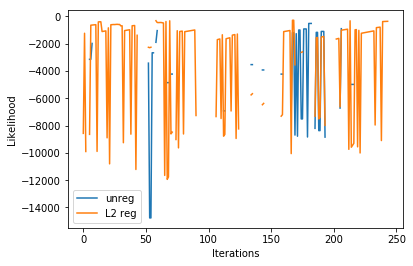

In [42]:
plt.plot(range(len(unreg_l)), unreg_l, label='unreg')
plt.plot(range(len(reg_l)), reg_l, label='L2 reg')
plt.xlabel('Iterations')
plt.ylabel('Likelihood')
plt.legend()
plt.show()